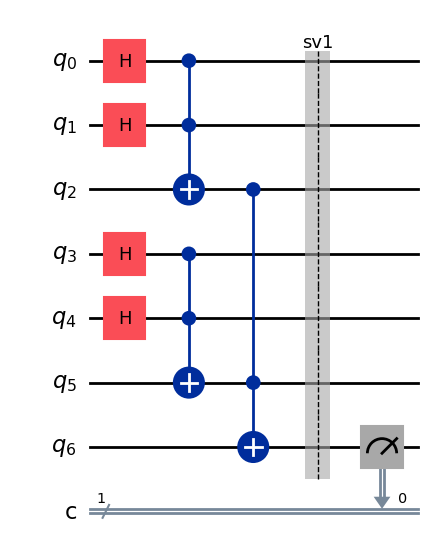

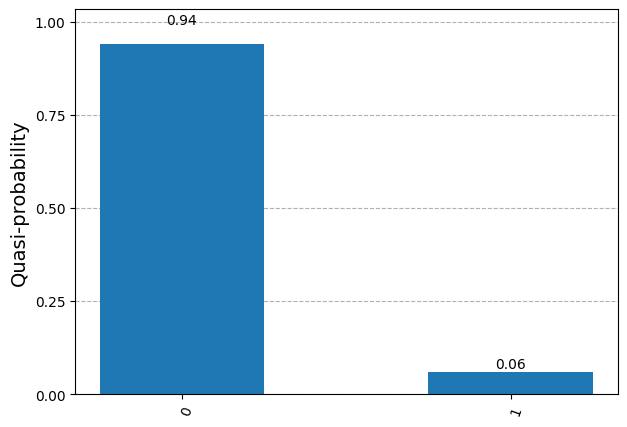

In [17]:
"""quantum_circuit3.ipynb"""

#Cell 01

from IPython.display import display
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import (
    plot_distribution,
)
from qiskit_aer import AerSimulator

qc = QuantumCircuit(7, 1)

qc.h(0)
qc.h(1)
qc.ccx(0, 1, 2)
qc.h(3)
qc.h(4)
qc.ccx(3, 4, 5)
qc.ccx(2, 5, 6)
qc.save_statevector("sv1")

qc.measure(6,0)

# Do not modify the following code
display(qc.draw(output="mpl"))

backend = AerSimulator()
qc_transpiled = transpile(qc, backend)
result = backend.run(qc_transpiled, shots=1_024).result()

counts = result.get_counts(qc)
display(plot_distribution(counts))


#Cell 02

The model above does not have noise built into it and the probabilty of q_6 ==1 is approximately 6.2 % from 1,024 shots. Increasing the number of shots can decrease the error in the probability of q_6 being 0 or 1. We can have, for example, 1_000_000 shots to obtain a better estimate. As to why q_6 has a low probability of 1 has to do with the design of the circuit itself and use of several Hadamard's and CCNOT gates. 


(Cell 03) We can introduce noise into our model to begin to approach a real-life implementation of a circuit as any circuit is likely to have at least some noise (code from Gemini AI). We see there are different results when the noise is introduced, in this case, q_6 == 1 is now 7.7% likely. 


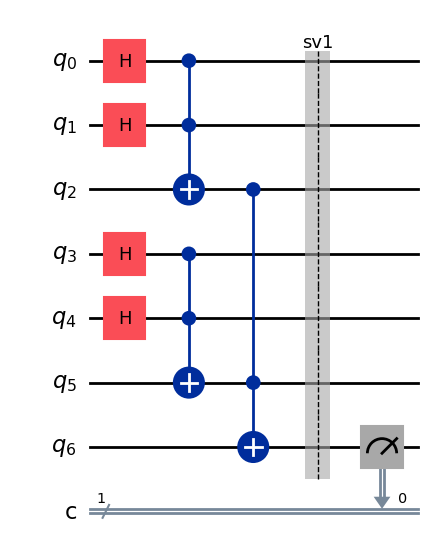


--- Results from the Noisy Simulator ---


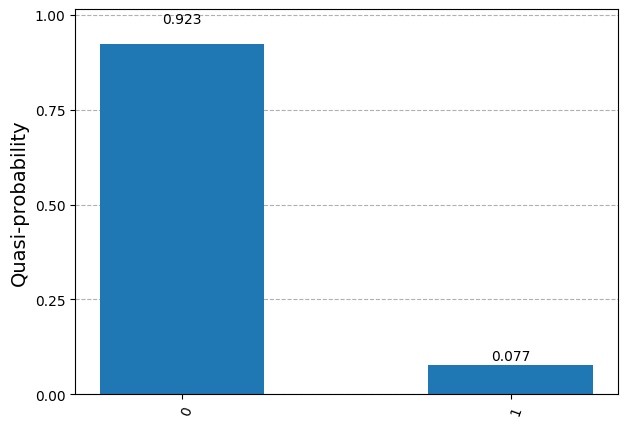

In [ ]:
#Cell 03

from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import (
    plot_distribution,
)
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error

# Create a custom noise model
noise_model = NoiseModel()
# Add a depolarizing error for the H gate with a probability of 0.1%
error_h = depolarizing_error(0.01, 1)
noise_model.add_quantum_error(error_h, ['h'], [0])

# Do not change the circuit definition
qc = QuantumCircuit(7, 1)

qc.h(0)
qc.h(1)
qc.ccx(0, 1, 2)
qc.h(3)
qc.h(4)
qc.ccx(3, 4, 5)
qc.ccx(2, 5, 6)
qc.save_statevector("sv1")

qc.measure(6,0)

# Do not modify the following code
display(qc.draw(output="mpl"))

print("\n--- Results from the Noisy Simulator ---")
backend_noisy = AerSimulator(noise_model=noise_model)
qc_transpiled_noisy = transpile(qc, backend_noisy)
result_noisy = backend_noisy.run(qc_transpiled_noisy, shots=1_024).result()

counts_noisy = result_noisy.get_counts(qc)
display(plot_distribution(counts_noisy))